<a href="https://colab.research.google.com/github/Ifeeding99/tensorflow-scripts/blob/main/1_6_million_tweets_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the sentiment140 dataset.
It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

    target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
    ids: The id of the tweet ( 2087)
    date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
    flag: The query (lyx). If there is no query, then this value is NO_QUERY.
    user: the user that tweeted (robotickilldozr)
    text: the text of the tweet (Lyx is cool)

The official link regarding the dataset with resources about how it was generated is here
The official paper detailing the approach is here

According to the creators of the dataset:

"Our approach was unique because our training data was automatically created, as opposed to having humans manual annotate tweets. In our approach, we assume that any tweet with positive emoticons, like :), were positive, and tweets with negative emoticons, like :(, were negative. We used the Twitter Search API to collect these tweets by using keyword search"

citation: Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.

link: https://www.kaggle.com/datasets/kazanova/sentiment140

In [ ]:
from google.colab import files
file = files.upload()

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, SimpleRNN, Dropout, Dense

In [ ]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = 'latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [ ]:
df.pop('1467810369')
df.pop('Mon Apr 06 22:19:45 PDT 2009')
df.pop('NO_QUERY')
df.pop('_TheSpecialOne_')
texts = df.pop('@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D')
labels = df.pop('0')

In [ ]:
l = []
for tweet in texts:
  l.append(len(tweet))

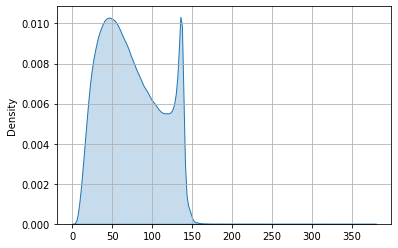

In [ ]:
sns.kdeplot(l,fill = True)
plt.grid()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels)

In [ ]:
# preprocessing text
vocab_size = 10000
max_len_tweet = 150
encoder = TextVectorization(max_tokens = vocab_size, output_sequence_length = max_len_tweet)
encoder.adapt(X_train)

In [ ]:
X_train = encoder(X_train)
X_test = encoder(X_test)

In [ ]:
# changing label values: 0 = negative, 1 = neutral, 2 = positive
y_train /= 2
y_test /= 2

In [ ]:
# building the model

input_ = Input(shape = (150,))
emb = Embedding(input_dim = vocab_size, output_dim = 256, mask_zero = True, input_length = 150)(input_)
x = LSTM(units = 128, activation = 'tanh', dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True)(emb)
x = LSTM(units = 128, activation = 'tanh', dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True)(x)
x = LSTM(units = 64, activation = 'tanh')(x)
x = Dense(units = 64, activation = 'relu')(x)
x = Dense(units = 32, activation = 'relu')(x)
output_layer = Dense(units = 3, activation = 'softmax')(x)

model = Model(inputs = input_, outputs = output_layer)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

stop = EarlyStopping(min_delta = 0.02, patience = 3)

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train = np.expand_dims(y_train, axis = 1)
y_train

array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [2.],
       [2.]])

In [ ]:
y_test = np.expand_dims(y_test, axis = 1)

In [ ]:
X_train

<tf.Tensor: shape=(1199999, 150), dtype=int64, numpy=
array([[   1,    2,  703, ...,    0,    0,    0],
       [   1,   61,   69, ...,    0,    0,    0],
       [   9,   10,   21, ...,    0,    0,    0],
       ...,
       [  21,  315,   34, ...,    0,    0,    0],
       [   1, 1061,  354, ...,    0,    0,    0],
       [  14, 1240,    6, ...,    0,    0,    0]])>

In [ ]:
training = model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          batch_size = 128,
          epochs = 20,
          callbacks = [stop])

Epoch 1/20
  48/9375 [..............................] - ETA: 7:40:41 - loss: 0.7680 - accuracy: 0.5011

KeyboardInterrupt: ignored